In [1]:
import matplotlib.pyplot as plt
import os, re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from datetime import datetime as dt
import cPickle as pickle
import re #Regex
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
import MySQLdb
import pandas as pd

req = 'http://skripsitgs.hol.es/api/feedparsing'
df_feedparse = pd.read_json(req)

print df_feedparse.shape

(2227, 6)


In [4]:
jenisFeed = list(set(df_feedparse.idfeed.values))
memoriFeed= dict()
timeFeed  = dict()
for eachFeed in jenisFeed:
    totalMem  = df_feedparse[df_feedparse.idfeed == eachFeed].memori.sum()
    totalTime = df_feedparse[df_feedparse.idfeed == eachFeed].waktu.sum()
    totalNews = df_feedparse[df_feedparse.idfeed == eachFeed].jumlahnews.sum()
    memoriFeed[eachFeed] = totalMem/totalNews
    timeFeed[eachFeed]   = totalTime/totalNews
print 'Memori per 1 feed  : ',memoriFeed,'\n'
print 'Waktu  per 1 feed  : ',timeFeed
print 'Rerata Mems per 1 berita: ',df_feedparse.memori.sum()/df_feedparse.jumlahnews.sum()
print 'Rerata Time per 1 berita: ',df_feedparse.waktu.sum()/df_feedparse.jumlahnews.sum()

Memori per 1 feed  :  {1: 2071, 2: 1980, 3: 11069, 4: 1950, 5: 1635, 6: 7367, 7: 2803, 8: 1755} 

Waktu  per 1 feed  :  {1: 0.00910376430976431, 2: 0.013292841924398627, 3: 0.015415701818181816, 4: 0.070590807017543861, 5: 0.024926968421052631, 6: 0.084647885338345857, 7: 0.061300399239543731, 8: 0.059901113207547173}
Rerata Mems per 1 berita:  4932
Rerata Time per 1 berita:  0.0198198377705


In [5]:
jenisFeed = list(set(df_feedparse.idfeed.values))
for eachFeed in jenisFeed:
    print eachFeed,' : ',list(set(df_feedparse[df_feedparse.idfeed == eachFeed].jumlahnews))

1  :  [200]
2  :  [100]
3  :  [200]
4  :  [20]
5  :  [50]
6  :  [16]
7  :  [20]
8  :  [20]


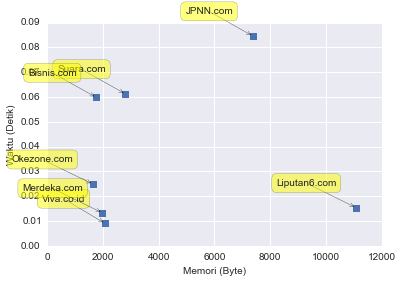

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8]
labels = ['Viva.co.id',  'Merdeka.com', 'Liputan6.com', 'Okezone.com', 'JPNN.com', 'Suara.com', 'Bisnis.com']
y1 = [memoriFeed[i] for i in x]
y2 = [timeFeed[i] for i in x]

plt.plot(y1, y2,'s')
plt.xlabel('Memori (Byte)', fontsize=10)
plt.ylabel('Waktu (Detik)', fontsize=10)
for label, x, y in zip(labels, y1, y2):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
plt.show()

In [63]:
import MySQLdb
import pandas as pd

mysql_cn = MySQLdb.connect(host = "localhost",
                     user = "root",
                     passwd = "",
                     db = "news_yii2-19082016")
#                      db = "news_yii2-backup")
df_mysql = pd.read_sql('select * from news;', con=mysql_cn,index_col='id')
dfNewsLink_mysql = pd.read_sql('select * from newslink;', con=mysql_cn, index_col='id')
mysql_cn.close()

print df_mysql.shape

(58446, 11)


In [64]:
df_mysql['feedMem'] = df_mysql.sumber.map(lambda x: memoriFeed[x])
df_mysql['feedTime'] = df_mysql.sumber.map(lambda x: timeFeed[x])
df_mysql.head()

,created_at,updated_at,sumber,url,judul,shortDesc,longDesc,published,crawlTime,crawlMem,flag,feedMem,feedTime
id,,,,,,,,,,,,,
731,2016-04-19 09:26:16,2016-08-19 05:53:52,2,http://www.merdeka.com/peristiwa/tiba-di-kpk-b...,"Tiba di KPK, bos Agung Sedayu Group diam serib...","<img src=""http://cdn.klimg.com/merdeka.com/i/w...",\t\t\t\tMerdeka.com - CEO PT Agung Sedayu Gro...,None,0.0677,2784,0,1987,0.015189
730,2016-04-19 09:26:15,NaT,2,http://www.merdeka.com/jakarta/tak-takut-digug...,"Tak takut digugat warga, Ahok cuma takut sama ...","<img src=""http://cdn.klimg.com/merdeka.com/i/w...",\t\t\t\tMerdeka.com - Dalam berbagai kebijakan...,None,0.0595,2784,0,1987,0.015189
729,2016-04-19 09:26:15,NaT,2,http://www.merdeka.com/peristiwa/edarkan-ganja...,"Edarkan ganja ke nelayan & pelajar, Kardiman d...","<img src=""http://cdn.klimg.com/merdeka.com/i/w...","\t\t\t\tMerdeka.com - Kardiman, seorang penged...",None,0.0605,2784,0,1987,0.015189
727,2016-04-19 09:15:21,NaT,8,http://jakarta.bisnis.com/read/20160419/385/53...,CUACA JABODETABEK 19 APRIL: Tangerang dan Beka...,Wilayah Tangerang dan Bekasi diprediksi akan d...,"\tBisnis.com, JAKARTA - Wilaya...",None,0.0000,NaN,0,1783,0.067122
728,2016-04-19 09:26:15,NaT,2,http://www.merdeka.com/dunia/rs-di-india-sedia...,RS di India sediakan layanan barter bayi,"<img src=""http://cdn.klimg.com/merdeka.com/i/w...",\t\t\t\tMerdeka.com - Kepolisian Negara Bagian...,None,0.1663,2656,0,1987,0.015189


In [65]:
pickle.dump( memoriFeed, open( "v1.3\memoriFeed.p", "wb" ) )
pickle.dump( timeFeed, open( "v1.3\waktuFeed.p", "wb" ) )
pickle.dump( df_mysql, open( "v1.3\df_mysql.p", "wb" ) )

In [17]:
from HTMLParser import HTMLParser
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ' '.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    striped  = s.get_data()                         #get HTML-Tags free text
    lowers   = striped.lower()                       #Lowercase all words
    nospace  = lowers.strip()                       #Remove leading and trailing white space
    return nospace

In [7]:
import MySQLdb
import pandas as pd

req = 'http://localhost/yiiNews-UI/web/news/evaluate'
df_feedparse = pd.read_json(req)

print df_feedparse.shape

(1508, 12)


In [8]:
df_feedparse.head()

,crawlMem,crawlTime,created_at,flag,id,judul,longDesc,published,shortDesc,sumber,updated_at,url
0,NaN,NaN,2016-09-14 08:56:34,-2,61855,"Investor Tunggu Kepastian The Fed, Pasar Ameri...",\n\t\t\t\t\n\t\t\t\t Pasar Amerika ditutup mel...,2016-09-14 08:54:51,\n\t\t\t\t\n\t\t\t\t Pasar Amerika ditutup mel...,7,NaT,http://www.suara.com/bisnis/2016/09/14/085451/...
1,NaN,NaN,2016-09-14 08:56:27,-2,61838,Sentimen Global Kembali Bayangi Pergerakan Rup...,Harga minyak yang melemah dan dampak The Fed p...,2016-09-14 08:49:49,Harga minyak yang melemah dan dampak The Fed p...,1,NaT,http://bisnis.news.viva.co.id/news/read/821400...
2,NaN,NaN,2016-09-14 08:56:33,-2,61854,Deklarasi Harta Tax Amnesty Capai Rp406 Triliu...,Direktorat Jenderal Pajak mencatat realisasi d...,2016-09-14 08:49:38,Direktorat Jenderal Pajak mencatat realisasi d...,5,NaT,http://economy.okezone.com/read/2016/09/14/20/...
3,NaN,NaN,2016-09-14 08:56:28,-2,61839,Petani tembakau versus kebijakan pemerintah so...,"Jika harga rokok naik, petani tembakau bisa sa...",2016-09-14 08:48:00,"Jika harga rokok naik, petani tembakau bisa sa...",2,NaT,http://www.merdeka.com/peristiwa/petani-tembak...
4,NaN,NaN,2016-09-14 08:56:28,-2,61840,"Ke Jatim, Presiden Jokowi nonton rangkaian Lat...",Presiden Jokowi didampingi Panglima TNI Jender...,2016-09-14 08:43:48,Presiden Jokowi didampingi Panglima TNI Jender...,2,NaT,http://www.merdeka.com/peristiwa/ke-jatim-pres...


In [26]:
neg = df_feedparse[df_feedparse.flag == -2].sample(20)
neg.shortDesc = neg.shortDesc.map(lambda x: strip_tags(x))
neg.longDesc  = neg.longDesc.map(lambda x: strip_tags(x))
# .to_csv('Hasil5.csv')

In [25]:
neg.to_csv('HasilNeg.csv',encoding='utf-8')

In [39]:
neg

,crawlMem,crawlTime,created_at,flag,id,judul,longDesc,published,shortDesc,sumber,updated_at,url
79,NaN,NaN,2016-09-14 07:53:27,-2,61665,Bayi Kembar 4 Lahir di Surabaya,"liputan6.com, surabaya - bayi kembar empat pas...",2016-09-14 07:07:07,"liputan6.com, surabaya - bayi kembar empat pas...",3,NaT,http://regional.liputan6.com/read/2601061/bayi...
1296,2936,0.3427,2016-05-29 02:01:03,-2,44954,"Induk Alfamart Gelontorkan Rp 2,9 Triliun-JPNN...",tangerang perekonomian yang masih lesu tak m...,2016-05-28 19:01:46,tangerang perekonomian yang masih lesu tak m...,6,NaT,http://www.jpnn.com/read/2016/05/29/420317/Ind...
619,NaN,NaN,2016-09-13 21:21:46,-2,61108,LPS Pangkas Tingkat Bunga Penjaminan,kebijakan ini sejalan dengan tren penurunan bu...,2016-09-13 15:58:48,kebijakan ini sejalan dengan tren penurunan bu...,1,NaT,http://bisnis.news.viva.co.id/news/read/821149...
1333,3512,0.6189,2016-05-20 15:00:46,-2,35695,VIDEO: Kemenhub Bekukan Izin Penambahan Rute B...,"liputan6.com, jakarta - setelah sebelumnya men...",2016-05-20 07:12:57,manajemen lion air memprotes keputusan sanksi ...,3,NaT,http://tv.liputan6.com/read/2511750/video-keme...
1384,2368,1.2587,2016-05-11 07:06:42,-2,24506,Bank Artha Graha Resmi Menjadi Bank Penyalur KUR,suara.com - pada hari selasa (10/5/2016) dilak...,2016-05-10 23:20:16,ini sejalan dengan program bank artha graha un...,7,NaT,http://www.suara.com/bisnis/2016/05/11/062016/...
313,NaN,NaN,2016-09-14 06:09:05,-2,61610,Bupati Dedi beri hadiah perbaikan stadion ke t...,"rencananya, stadion tersebut akan direvitalisa...",2016-09-13 20:44:00,"rencananya, stadion tersebut akan direvitalisa...",2,NaT,http://www.merdeka.com/peristiwa/bupati-dedi-b...
117,NaN,NaN,2016-09-14 08:37:04,-2,61837,Segmen 1: Evakuasi Korban Tenggelam hingga Keb...,"liputan6.com, sukabumi - pencarian korban teng...",2016-09-14 06:24:07,"liputan6.com, sukabumi - pencarian korban teng...",3,NaT,http://tv.liputan6.com/read/2600877/segmen-1-e...
831,NaN,NaN,2016-09-11 15:20:43,-2,61028,Kepala BNN minta Calon Kepala Daerah dari PDIP...,narkoba telah menjadi ancaman bagi anak bangsa.,2016-09-10 22:27:27,narkoba telah menjadi ancaman bagi anak bangsa.,2,NaT,http://www.merdeka.com/peristiwa/kepala-bnn-mi...
1431,2808,0.5603,2016-05-04 16:06:13,-2,18929,Wings Air buka rute penerbangan baru dari Lamp...,merdeka.com - wings air melakukan ekspansi den...,2016-05-04 08:33:48,wings air juga menambah frekuensi penerbangan ...,2,NaT,http://www.merdeka.com/uang/wings-air-buka-rut...
552,NaN,NaN,2016-09-13 21:27:24,-2,61408,Pembangunan Rusun Atlet Asian Games Selesai Ak...,"liputan6.com, jakarta kementerian pekerjaan um...",2016-09-13 16:57:27,"liputan6.com, jakarta kementerian pekerjaan um...",3,NaT,http://bisnis.liputan6.com/read/2600749/pemban...


In [45]:
pos = df_feedparse[df_feedparse.flag == 2]
pos.to_csv('HasilPos.csv',encoding='utf-8')